In [31]:
using Plots, JLD, Base.Filesystem, OffsetArrays, LaTeXStrings

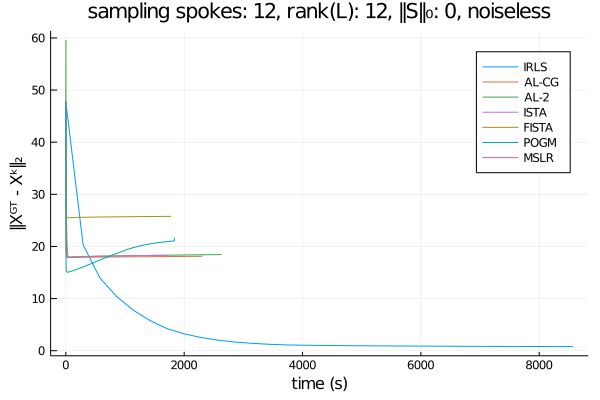

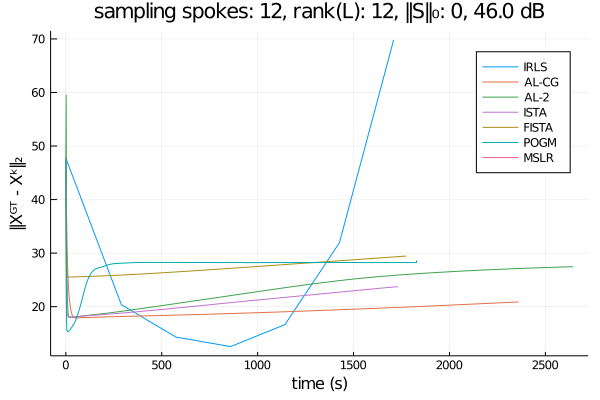

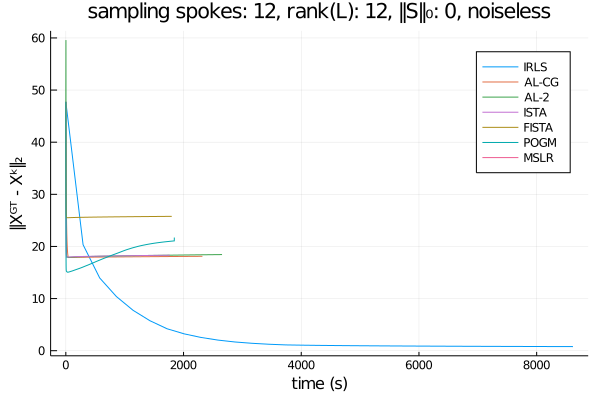

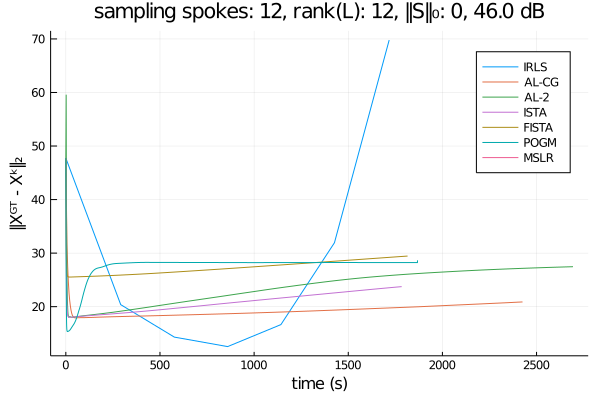

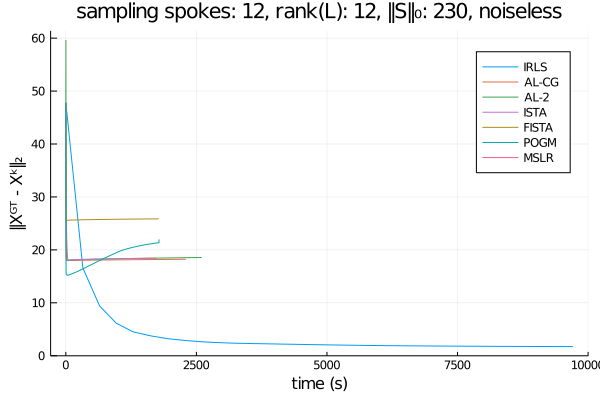

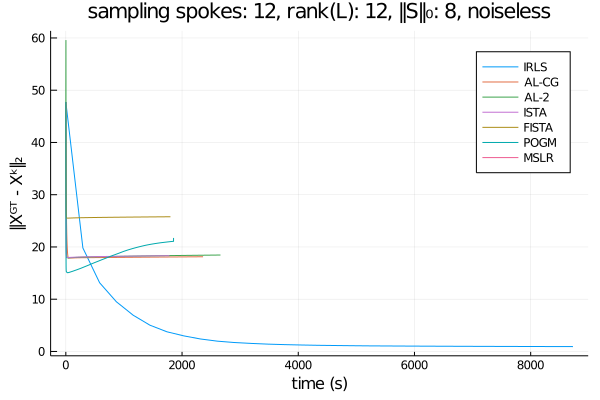

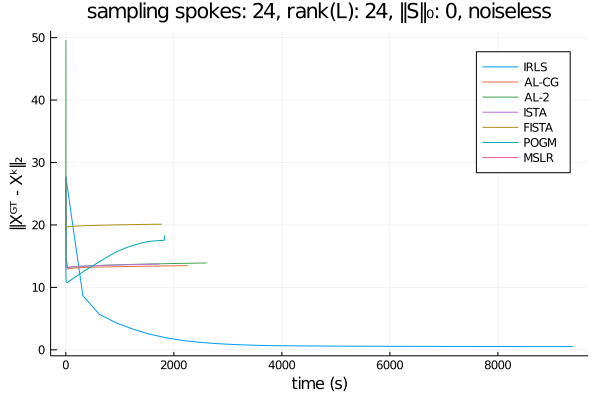

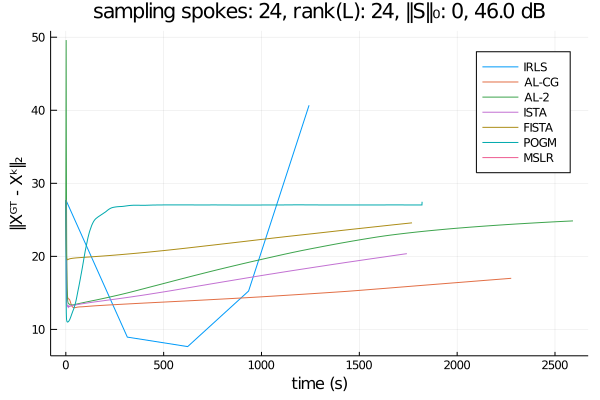

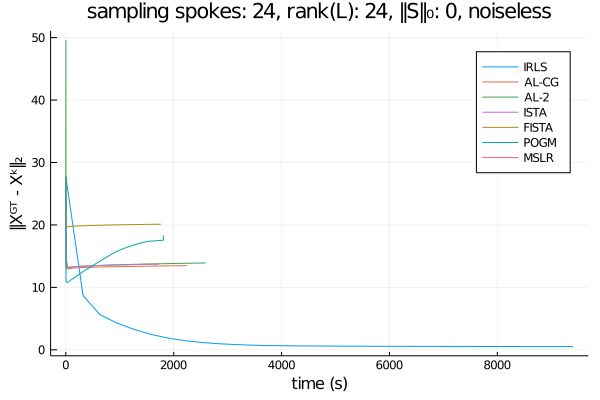

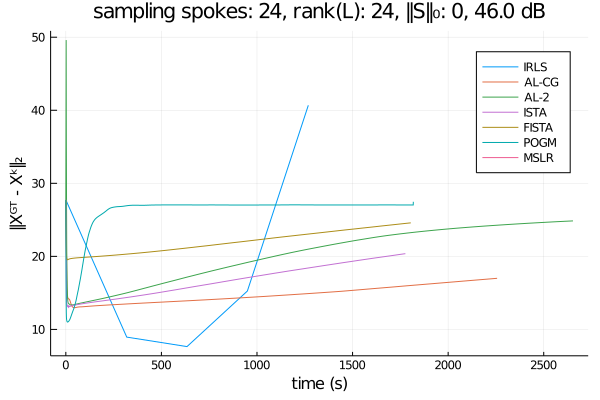

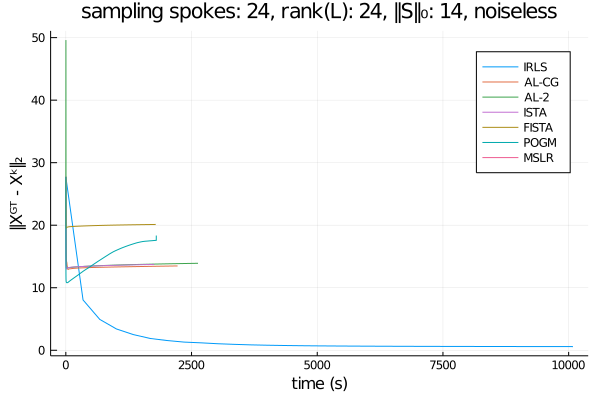

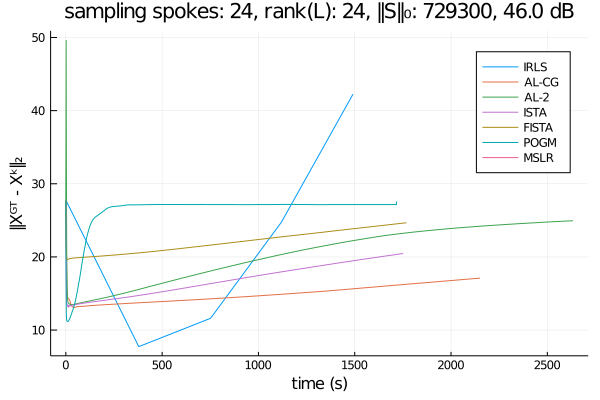

In [79]:
for (root, dirs, files) in walkdir("first_trial")
    for file in files
        if endswith(file, ".jld")
            path = joinpath(root, file)
            d = load(path)
            cost_irls = d["cost_irls"]
            time_irls = d["time_irls"]
            ff = findfirst(cost_irls .> cost_irls[0])
            if !(ff isa Nothing)
                cost_irls = cost_irls[0:ff]
                time_irls = time_irls[0:ff]
            end
            
            noise = d["SNR_dB"] < Inf ? string(d["SNR_dB"]) * " dB" : "noiseless"
            p = plot(time_irls, cost_irls, label="IRLS",
                title = """sampling spokes: $(d["line"]), rank(L): $(d["target_rank"]), ‖S‖₀: $(d["s"]), $noise""",
                xlabel = "time (s)", ylabel = "‖Xᴳᵀ - Xᵏ‖₂")
            
            plot!(d["time_cg"], d["cost_cg"], label="AL-CG")
            plot!(d["time_al"], d["cost_al"], label="AL-2")
            plot!(d["time_ista"], d["cost_ista"], label="ISTA")
            plot!(d["time_fista"], d["cost_fista"], label="FISTA")
            plot!(d["time_pogm"], d["cost_pogm"], label="POGM")
            
            cost_mslr = d["cost_irls"]
            time_mslr = d["time_irls"]
            ff = findfirst(cost_mslr .> cost_mslr[1])
            if !(ff isa Nothing)
                cost_mslr = cost_mslr[0:ff]
                time_mslr = time_mslr[0:ff]
            end
            plot!(time_mslr[1:end], cost_mslr[1:end], label="MSLR")
            display(p)
        end
    end
end